In [1]:
### BIO index clustering - python-only pipeline



In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [1]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py'>

# this bit is clustering and doesn't need rerunning

## masking edges

In [2]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar0 = np.array(d_stn_x)
d_stn_yar0 = np.array(d_stn_y)

edge = np.where((d_stn_xar0<=10) | (d_stn_yar0>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]
print(edge)
d_stn_xar =np.delete(d_stn_xar0,edge)
d_stn_yar = np.delete(d_stn_yar0,edge)
print(np.size(d_stn_xar))


    

(array([ 0,  1,  2,  3,  4,  5,  6,  7, 41]),)
571


In [4]:
pickle.dump(d_stn_xar, open('./pkls/Xcoords_for571_stations.pkl', 'wb'))
pickle.dump(d_stn_yar, open('./pkls/Ycoords_for571_stations.pkl', 'wb'))

In [22]:
tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2013/WIND_TS/try1/stn_9_wind_data_sp10.nc'
q = (nc.Dataset(tdir))
print(q['wind_energy'][:])

[31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977 31.67446977
 31.67446977 31.67446977 31.67446977 31.67446977 31

In [17]:


tdir = '/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2013m05d01.nc'
w = nc.Dataset(tdir)
tdir2 = '/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2013m05d02.nc'
w2 = nc.Dataset(tdir2)
print(w['u_wind'][:,100,100])
print(w2['u_wind'][:,100,100])
# w = nc.Dataset(tdir+'stn_105_wind_data_sp10.nc')
# print(w['wind_energy'][:])

w = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/WINDFILES_interp/windint_20130401.nc'
print(nc.Dataset(w))

[ 5.1001534   5.2224517   5.315955    5.316893    5.122643    4.972935
  5.315898    3.486457    2.8350441   2.2713256   2.2567112   2.142375
  1.7262965   1.3249087   0.02221105 -1.5630871  -1.9546794  -1.0233082
  1.0511981   2.0010638   1.6459342   2.1425776   2.4778836   2.5202014 ]
[ 2.2309124   1.5785758   1.3875647   0.70039594  0.27282822  0.18536347
  0.08130777  0.2376036  -0.03894073 -0.13783109 -0.99274915 -1.305316
 -1.3504554  -1.4747814  -1.5797558  -0.7521077  -0.10330981 -0.16409057
  0.72487754  2.134293    2.7981815   2.6368675   2.7324      0.57748693]
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(898), x(398)
    variables(dimensions): float64 daily_avg_windmag(y,x), float64 daily_avg_windstress(y,x), float64 daily_avg_windenergy(y,x)
    groups: 



In [18]:
w = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/WINDFILES_interp/windint_20130401.nc'
tt= (nc.Dataset(w))
print(tt['daily_avg_windenergy'][250,250])
w = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/WINDFILES_interp/windint_20130503.nc'
tt= (nc.Dataset(w))
print(tt['daily_avg_windenergy'][250,250])

26.201636898664372
74.23760017970517


In [27]:
w = nc.Dataset('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2014/WIND_TS/stn_0_wind_data_sp10.nc')
print(w['wind_energy'][:])

[ 198.56717783  342.0369533   815.17547839  153.68510622 1159.34810148
 1058.97710485  237.1390363   440.04642295  953.6127615   648.18385281
 2484.48269386 1731.78653454  723.92205403   59.60415468   20.94726753
  773.51742217 1067.61741853  250.98509934   76.06110587  666.15746034
  409.71264019   44.73065814  383.56129535  838.96646958  310.98746568
  279.04248217  575.88972531  194.17039709  446.42616202  936.7622771
  221.9004775   131.11356595  152.60686354  269.07704255  428.1881808
 1548.41080988 2462.1619667   516.95687658 1504.99688521  755.50307065
  961.6830882   375.4151746   865.25221618  909.16787556 1037.70383052
  919.52225055 1380.29535573  832.22594577 1234.88805045  982.30321195
  894.14330656  364.93654647   85.3945713  1056.08994397 2037.30152014
 1728.83716625 1037.314592    127.02023004  216.34757295  906.83212645
  268.66014654  318.84393042  160.59254666  458.13207916  622.28880851
  207.64439716  237.33228927  269.75303582  204.16989999  104.29143588
  122.42

In [5]:
## areas of stations

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
ydir = w['e1t'][0,:,:]
xdir = w['e2t'][0,:,:]
aos = ydir*xdir
print(aos[250,250])

stn_areas = np.zeros(580)
for i in range(0,580):
    t_x = d_stn_xar0[i]
    t_y = d_stn_yar0[i]
    stn_areas[i] = aos[t_y,t_x]

222393.81673895908



#### agglomerate signals extracted and save as .pkl, for year in 2013-2016

In [6]:
# do this for years 2013  to 2016
years = ['2013','2014','2015','2016']

for year in years:
    if year == '2016':
        noday = 366
    if year != '2016':
        noday = 365
        
    print(year)
    basedir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/'


    varfolder = 'BIO_TS'
    tname = './pkls/bio_datamat_'+year+'.pkl'
    
    signalmat = np.zeros([np.size(d_stn_xar),noday*3])
    count = 0 
    for i in range(0,580):
        
        if i not in edgear:
                #stn_360_sp10.nc
            pattern  = f'stn_{i}_sp10.nc'
            
            tdat = nc.Dataset(basedir+year +'/'+ varfolder +'/'+pattern)
           # print(tdat)
            signalmat[count,0:noday] = tdat['PHY'][:]/stn_areas[i]
            
            signalmat[count,(noday):(noday*2)] = tdat['PHY2'][:]/stn_areas[i]
            signalmat[count,noday*2:noday*3] = tdat['MYRI'][:]/stn_areas[i]
            count = count+1

    pickle.dump(signalmat, open(tname, 'wb'))


2013
2014
2015
2016


## open the resulting signalmats, cluster from 2-N (N=100) clusters, save linkage matrix and cluster matrices, visualise dendrograms

In [7]:
for year in years:
    print(year)
    signalmat = pickle.load(open('./pkls/bio_datamat_'+year+'.pkl', 'rb'))

    Z = linkage(signalmat, 'ward')
    pickle.dump(Z, open('./pkls/bio_linkmat_'+year+'.pkl', 'wb'))
    
    clustermat = np.zeros([100,np.size(d_stn_xar)])                           
    for k in range(0,100): 
        clustermat[k,:] = fcluster(Z, k+1, criterion='maxclust')
    pickle.dump(clustermat, open('./pkls/bio_clustmat_'+year+'.pkl', 'wb'))

2013
2014
2015
2016


## this bit is plotting 

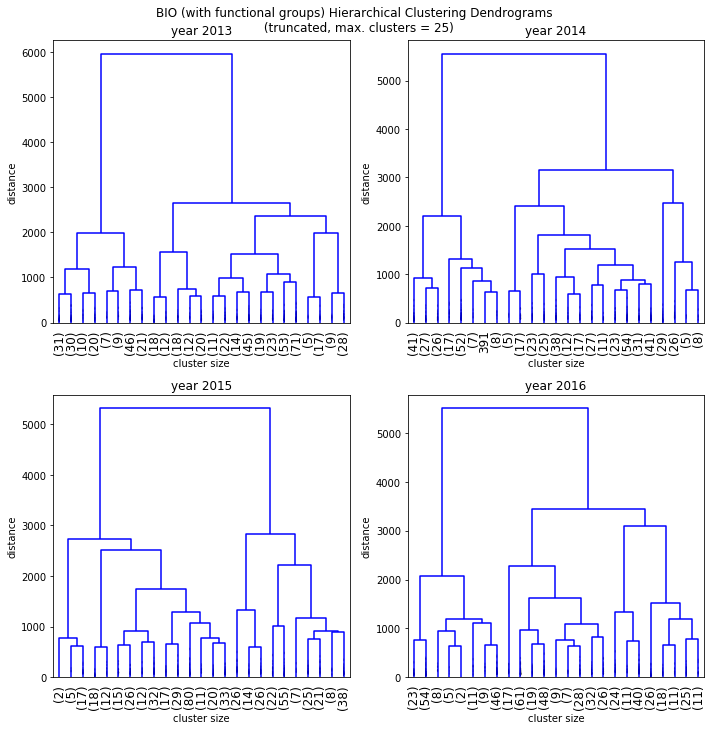

In [8]:
fact = 1
ms = 4
markersize = 10
legfontsize = 8

fig = plt.figure(figsize=(10*fact, 10*fact))

#####bio
ax1 = plt.subplot2grid((2,2),(0,0))
Z = pickle.load(open('./pkls/bio_linkmat_2013.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')

ax1 = plt.subplot2grid((2,2),(0,1))
Z = pickle.load(open('./pkls/bio_linkmat_2014.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')

ax1 = plt.subplot2grid((2,2),(1,0))
Z = pickle.load(open('./pkls/bio_linkmat_2015.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')

ax1 = plt.subplot2grid((2,2),(1,1))
Z = pickle.load(open('./pkls/bio_linkmat_2016.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')

plt.suptitle('BIO (with functional groups) Hierarchical Clustering Dendrograms \n (truncated, max. clusters = 25)', y = 1.01)
plt.tight_layout()
plt.show()

var = 'BIO'
fig.savefig(f'./paper_figs/{var}_dendrograms.pdf', bbox_inches='tight')



#### 'objective' measures of clustering are sometimes hard to defend

##### one way to circumvent this obvious problem is to look manually at the visual clusters provided


## 2013

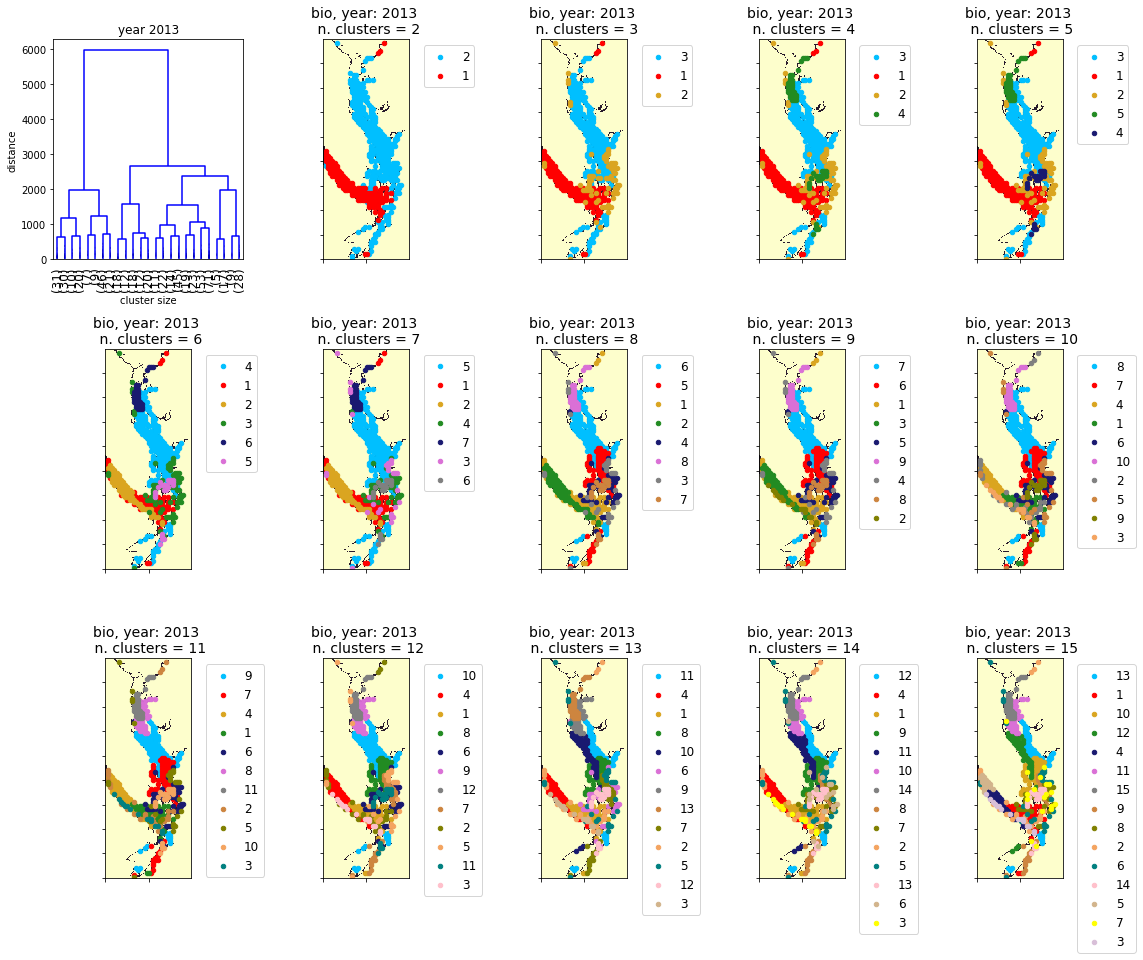

In [9]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/bio_linkmat_2013.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2013','bio',2)
vp.clusters(axs[0,2],'2013','bio',3)
vp.clusters(axs[0,3],'2013','bio',4)
vp.clusters(axs[0,4],'2013','bio',5)

vp.clusters(axs[1,0],'2013','bio',6)
vp.clusters(axs[1,1],'2013','bio',7)
vp.clusters(axs[1,2],'2013','bio',8)
vp.clusters(axs[1,3],'2013','bio',9)
vp.clusters(axs[1,4],'2013','bio',10)

vp.clusters(axs[2,0],'2013','bio',11)
vp.clusters(axs[2,1],'2013','bio',12)
vp.clusters(axs[2,2],'2013','bio',13)
vp.clusters(axs[2,3],'2013','bio',14)
vp.clusters(axs[2,4],'2013','bio',15)

plt.tight_layout()


year = 2013
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


## 2014

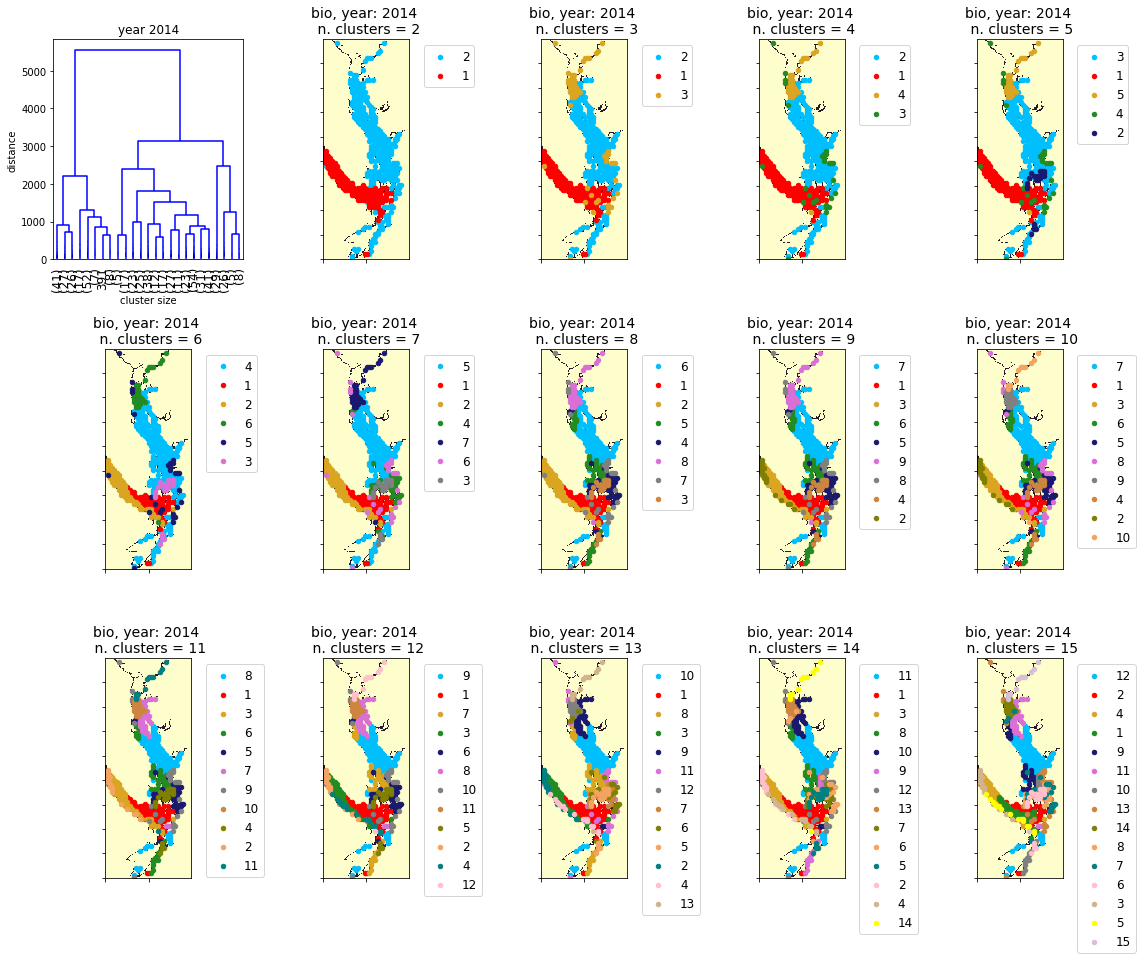

In [10]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/bio_linkmat_2014.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2014','bio',2)
vp.clusters(axs[0,2],'2014','bio',3)
vp.clusters(axs[0,3],'2014','bio',4)
vp.clusters(axs[0,4],'2014','bio',5)

vp.clusters(axs[1,0],'2014','bio',6)
vp.clusters(axs[1,1],'2014','bio',7)
vp.clusters(axs[1,2],'2014','bio',8)
vp.clusters(axs[1,3],'2014','bio',9)
vp.clusters(axs[1,4],'2014','bio',10)

vp.clusters(axs[2,0],'2014','bio',11)
vp.clusters(axs[2,1],'2014','bio',12)
vp.clusters(axs[2,2],'2014','bio',13)
vp.clusters(axs[2,3],'2014','bio',14)
vp.clusters(axs[2,4],'2014','bio',15)

plt.tight_layout()

year = 2014
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')




## 2015 

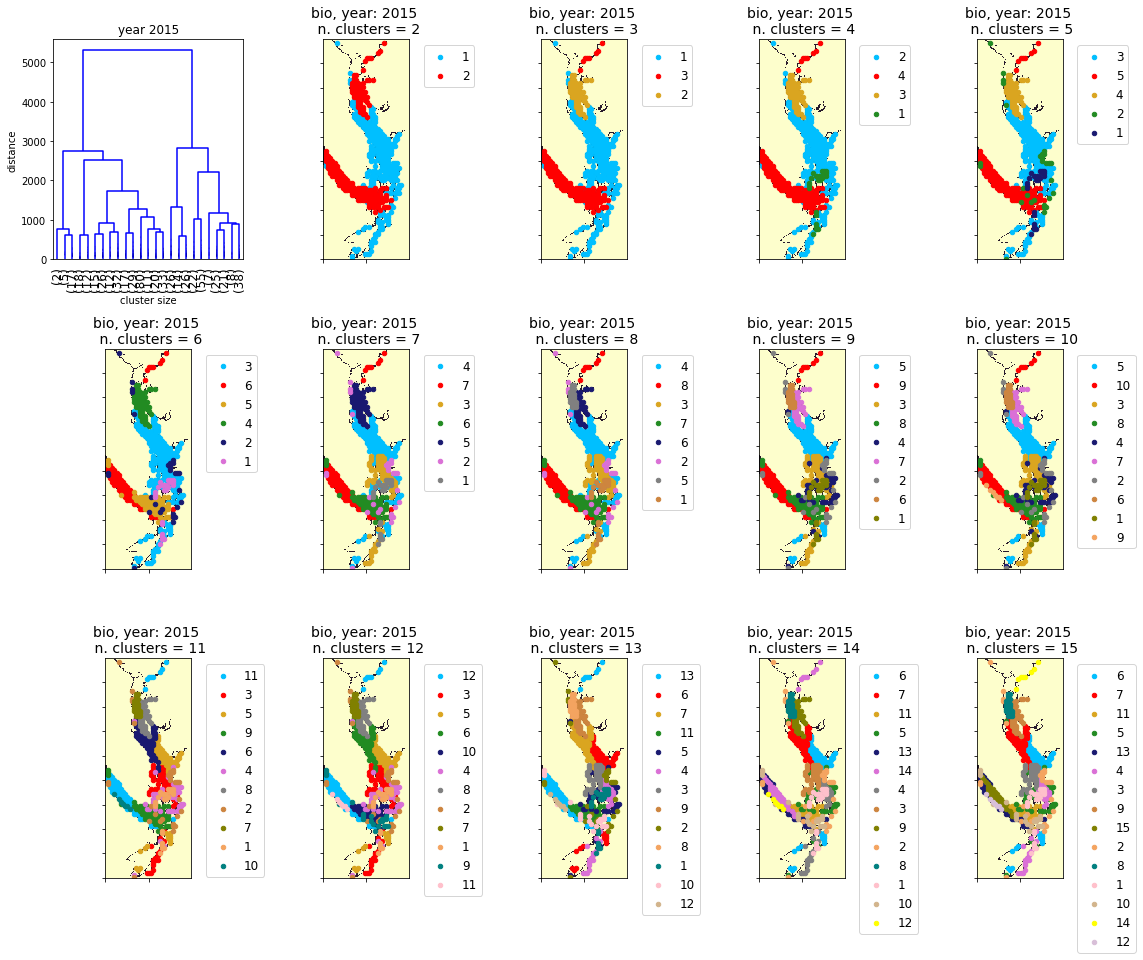

In [11]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/bio_linkmat_2015.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2015','bio',2)
vp.clusters(axs[0,2],'2015','bio',3)
vp.clusters(axs[0,3],'2015','bio',4)
vp.clusters(axs[0,4],'2015','bio',5)

vp.clusters(axs[1,0],'2015','bio',6)
vp.clusters(axs[1,1],'2015','bio',7)
vp.clusters(axs[1,2],'2015','bio',8)
vp.clusters(axs[1,3],'2015','bio',9)
vp.clusters(axs[1,4],'2015','bio',10)

vp.clusters(axs[2,0],'2015','bio',11)
vp.clusters(axs[2,1],'2015','bio',12)
vp.clusters(axs[2,2],'2015','bio',13)
vp.clusters(axs[2,3],'2015','bio',14)
vp.clusters(axs[2,4],'2015','bio',15)

plt.tight_layout()

year = 2015
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')



## 2016

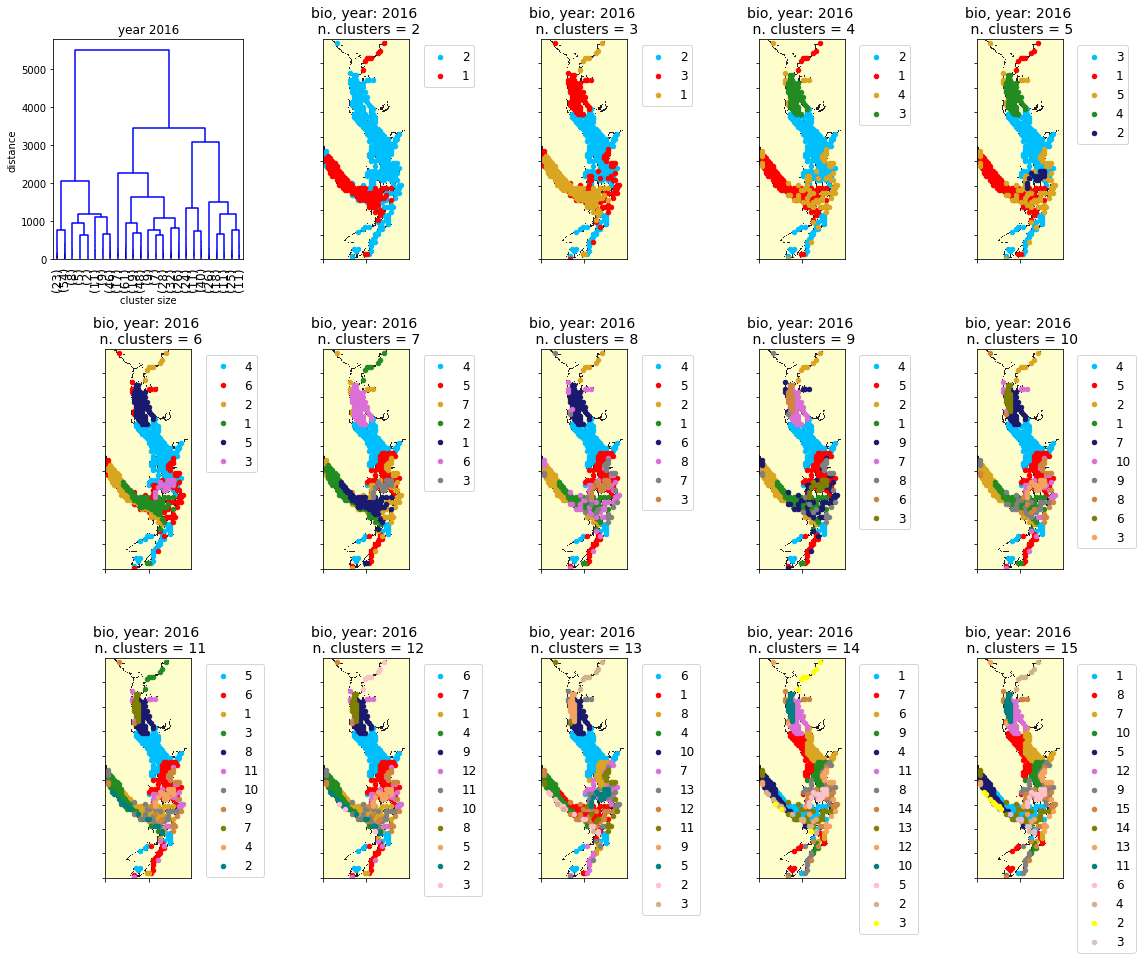

In [12]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/bio_linkmat_2016.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2016','bio',2)
vp.clusters(axs[0,2],'2016','bio',3)
vp.clusters(axs[0,3],'2016','bio',4)
vp.clusters(axs[0,4],'2016','bio',5)

vp.clusters(axs[1,0],'2016','bio',6)
vp.clusters(axs[1,1],'2016','bio',7)
vp.clusters(axs[1,2],'2016','bio',8)
vp.clusters(axs[1,3],'2016','bio',9)
vp.clusters(axs[1,4],'2016','bio',10)

vp.clusters(axs[2,0],'2016','bio',11)
vp.clusters(axs[2,1],'2016','bio',12)
vp.clusters(axs[2,2],'2016','bio',13)
vp.clusters(axs[2,3],'2016','bio',14)
vp.clusters(axs[2,4],'2016','bio',15)

plt.tight_layout()

year = 2016
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


#### 

In [13]:
cl_2013 = pickle.load(open('./pkls/bio_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('./pkls/bio_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('./pkls/bio_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('./pkls/bio_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('./pkls/bio_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/bio_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/bio_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/bio_datamat_2016.pkl', 'rb'))


## visualize original clusterings by size and do manual relabeling

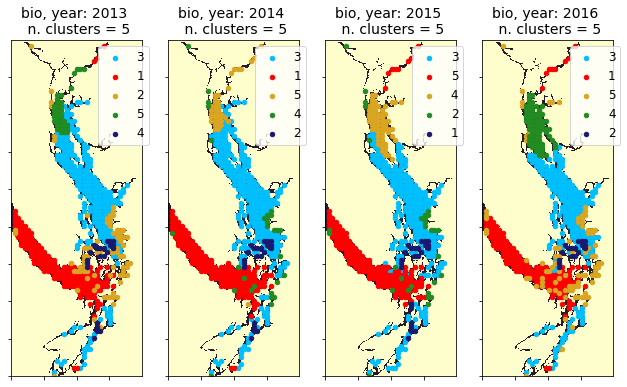

In [14]:
fact = 0.6
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters(axs[0],'2013','bio',5)
vp.clusters(axs[1],'2014','bio',5)
vp.clusters(axs[2],'2015','bio',5)
vp.clusters(axs[3],'2016','bio',5)

In [15]:


var = 'bio'
year = 2013
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2013_reass = np.zeros_like(cl_this)
cldes_2013_reass[cl_this == 1] = 5
cldes_2013_reass[cl_this == 2] = 2
cldes_2013_reass[cl_this == 3] = 3
cldes_2013_reass[cl_this == 4] = 1
cldes_2013_reass[cl_this == 5] = 4

year = 2014
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2014_reass = np.zeros_like(cl_this)
cldes_2014_reass[cl_this == 1] = 5
cldes_2014_reass[cl_this == 2] = 1
cldes_2014_reass[cl_this == 3] = 3
cldes_2014_reass[cl_this == 4] = 2
cldes_2014_reass[cl_this == 5] = 4

year = 2015
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2015_reass = np.zeros_like(cl_this)
cldes_2015_reass[cl_this == 1] = 1
cldes_2015_reass[cl_this == 2] = 2
cldes_2015_reass[cl_this == 3] = 3
cldes_2015_reass[cl_this == 4] = 4
cldes_2015_reass[cl_this == 5] = 5

year = 2016
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2016_reass = np.zeros_like(cl_this)
cldes_2016_reass[cl_this == 1] = 5
cldes_2016_reass[cl_this == 2] = 1
cldes_2016_reass[cl_this == 3] = 3
cldes_2016_reass[cl_this == 4] = 4
cldes_2016_reass[cl_this == 5] = 2





## chceck that reassigning worked

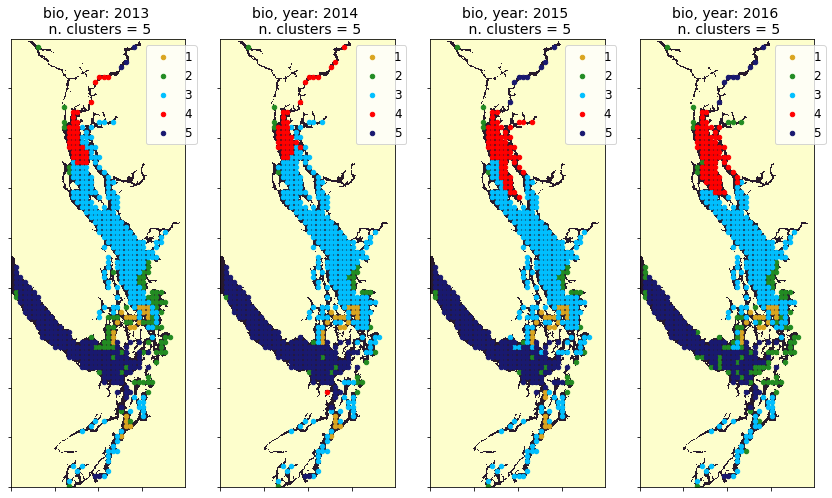

In [16]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
    
reload(vp)
fact = 0.8
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters_basic(axs[0],'2013','bio',5,cldes_2013_reass, colors)
vp.clusters_basic(axs[1],'2014','bio',5,cldes_2014_reass, colors)
vp.clusters_basic(axs[2],'2015','bio',5,cldes_2015_reass, colors)
vp.clusters_basic(axs[3],'2016','bio',5,cldes_2016_reass, colors)

In [17]:
pickle.dump(cldes_2013_reass, open('./pkls/BIO_clno_5_2013_reass.pkl', 'wb'))
pickle.dump(cldes_2014_reass, open('./pkls/BIO_clno_5_2014_reass.pkl', 'wb'))
pickle.dump(cldes_2015_reass, open('./pkls/BIO_clno_5_2015_reass.pkl', 'wb'))
pickle.dump(cldes_2016_reass, open('./pkls/BIO_clno_5_2016_reass.pkl', 'wb'))

In [3]:
te = pickle.load(open('./pkls/BIO_clno_5_2013_reass.pkl', 'rb'))  
print(np.shape(te))

(571,)


In [18]:
def cluster_patterns_mean_BIO(orig_data,cluster_des,cluster_no,noday):
    import numpy as np
    
    '''For a given data matrix (S stations X 365 daily signals), list of clusters designation (S stations), 
    and specific cluster, return an C_S x 365 matrix of the C_S annual signals in that cluster
    for the C_S stations in the cluster'''
    #which stations are in the cluster we are looking for?
    where_cluster = np.where(cluster_des == cluster_no)
    where_cluster = np.squeeze(where_cluster)
    #print(where_cluster.shape)
    #print(where_cluster.size)

    
    no_stns_in_cluster = where_cluster.size
    if no_stns_in_cluster == 1:
        this_stn = np.squeeze(where_cluster)
        where_cluster = this_stn
        signalmat = orig_data[this_stn,:]
        mean_signal = signalmat
    else:    
    
        signalmat = np.zeros([no_stns_in_cluster,noday*3])

        for stn in range(0,no_stns_in_cluster):

            this_stn = where_cluster[stn]
            signalmat[stn,:] = orig_data[this_stn,:]
        mean_signal = np.nanmean(signalmat, axis = 0)
    return mean_signal

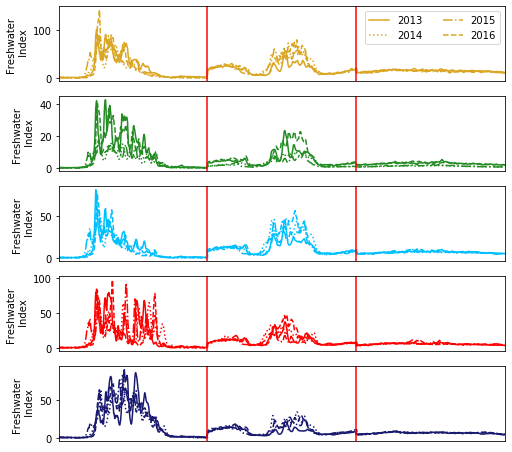

In [19]:
import cluster_fxn as cf

no_clust = 5

fact = 0.8
fig, axs = plt.subplots(5,1,figsize=(10*fact,10*fact))

#blues
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']

clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[0].plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
#axs[0].set_xlim([0,365])
axs[0].legend(loc = 'best', ncol = 2)

clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[1].plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
#axs[1].set_xlim([0,365])

clustdes = [3,3,3,3]

for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[2].plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
#axs[2].set_xlim([0,365])

clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[3].plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
#axs[3].set_xlim([0,365])

clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[4].plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
#axs[4].set_xlim([0,365])

for i in range(0,5):
    #axs[i].set_ylim([0,125])
    axs[i].set_ylabel('Freshwater \n Index')
    axs[i].set_xticks([])
    axs[i].set_xlim([0,365*3])
    axs[i].axvline(x=365,color = 'r')
    axs[i].axvline(x=365*2,color = 'r')
# w = axs[4].set_xticks(np.arange(0,390,30))
# w = axs[4].set_xlabel('days of year')

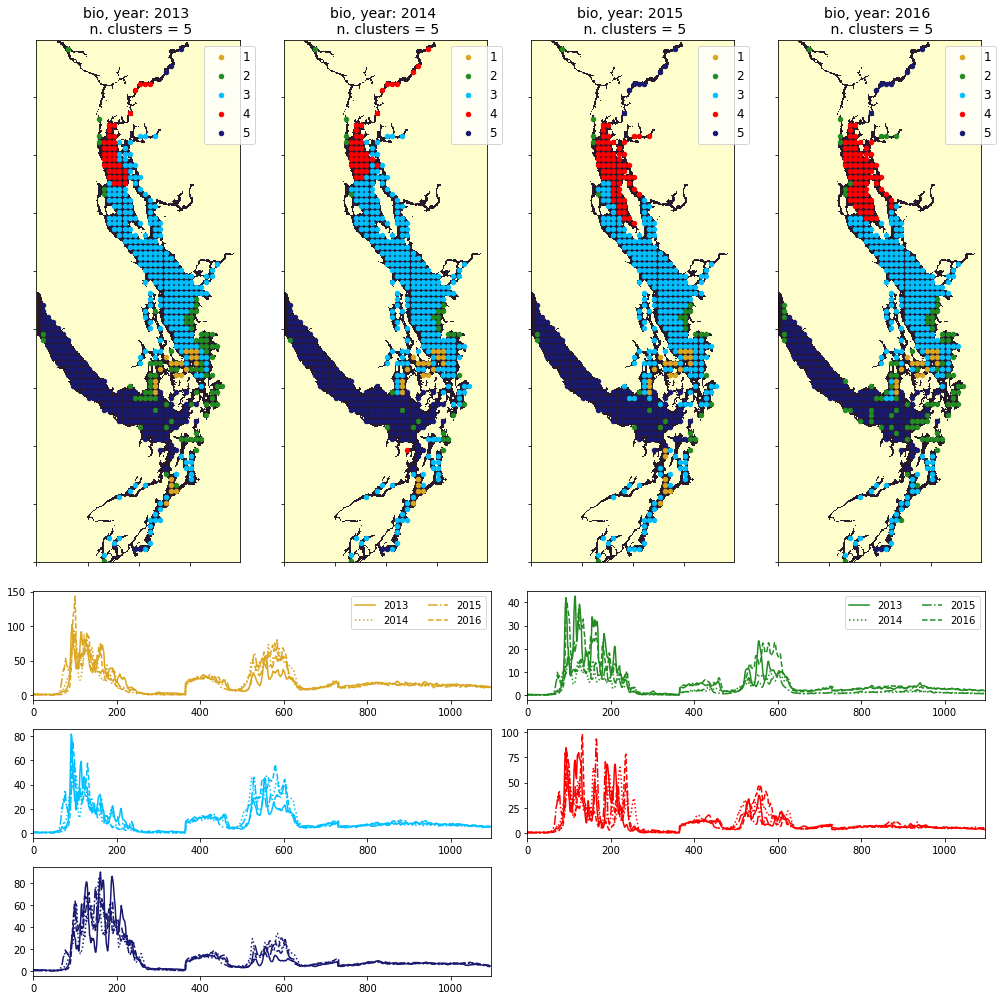

In [21]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']



fact = 2
fig = plt.figure(figsize=(7*fact, 7*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','bio',5,cldes_2013_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','bio',5,cldes_2014_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','bio',5,cldes_2015_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','bio',5,cldes_2016_reass, colors)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
#ax1.set_ylim([0,125])
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])

ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])


ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
#ax1.set_ylim([0,125])

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
#ax1.set_ylim([0,125])
# ax1 = plt.subplot2grid((7,4), (6,2), colspan=2, rowspan=1) 
# ax1.set_xticks([])
# ax1.set_yticks([])

plt.tight_layout()






/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py:115: RuntimeWarning: Mean of empty slice
  mean_signal = np.nanmean(signalmat, axis = 0)


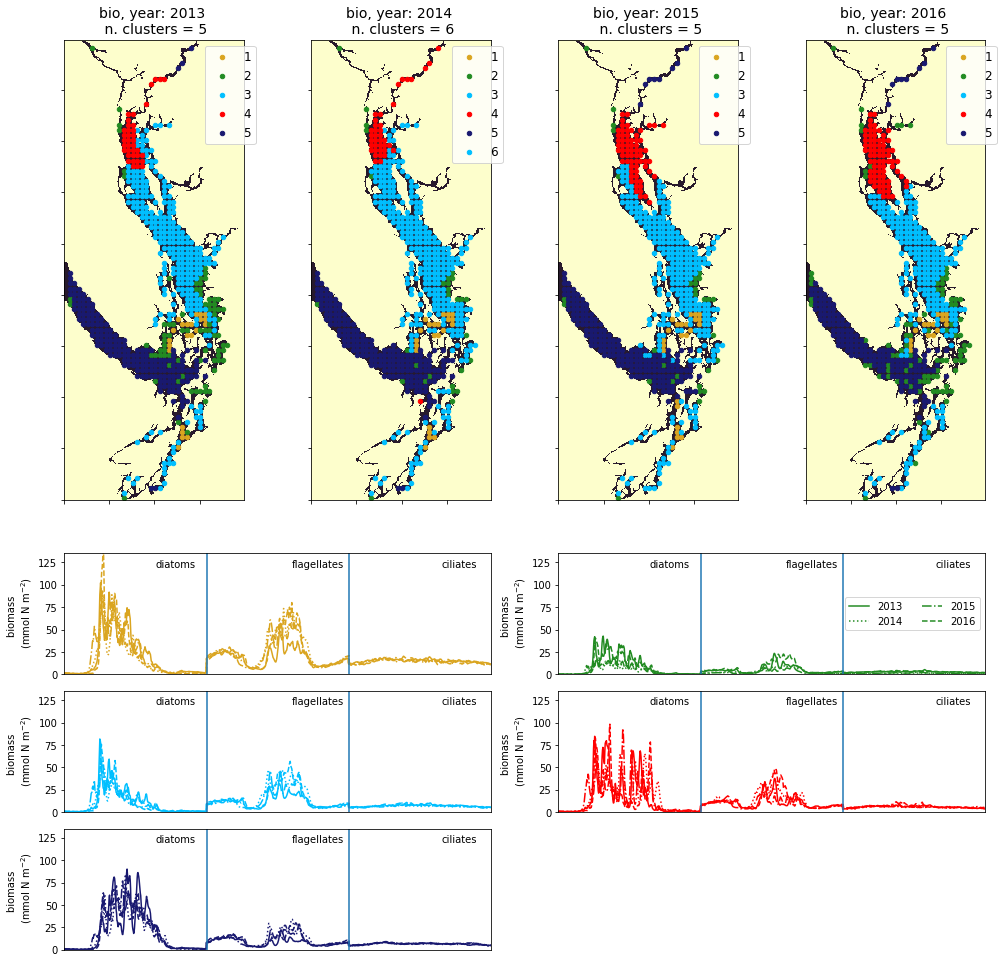

In [42]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,6,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 135
t_ylab = 'biomass \n (mmol N m$^{-2}$)'

fact = 2
fig = plt.figure(figsize=(7*fact, 7*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','bio',5,cldes_2013_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','bio',6,cldes_2014_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','bio',5,cldes_2015_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','bio',5,cldes_2016_reass, colors)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])
ax1.text(285,120, "diatoms", ha='center')
ax1.text(285+365,120, "flagellates", ha='center')
ax1.text(285+365*2,120, "ciliates", ha='center')
#ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])

ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])
ax1.text(285,120, "diatoms", ha='center')
ax1.text(285+365,120, "flagellates", ha='center')
ax1.text(285+365*2,120, "ciliates", ha='center')
ax1.legend(loc = 'center right', ncol = 2)


ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
    
ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])
ax1.text(285,120, "diatoms", ha='center')
ax1.text(285+365,120, "flagellates", ha='center')
ax1.text(285+365*2,120, "ciliates", ha='center')

ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])
ax1.text(285,120, "diatoms", ha='center')
ax1.text(285+365,120, "flagellates", ha='center')
ax1.text(285+365*2,120, "ciliates", ha='center')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])
ax1.text(285,120, "diatoms", ha='center')
ax1.text(285+365,120, "flagellates", ha='center')
ax1.text(285+365*2,120, "ciliates", ha='center')

plt.tight_layout()

var = 'BIO'
fig.savefig(f'./paper_figs/{var}_4Y_CLUSTERS_SEP.png', bbox_inches='tight')

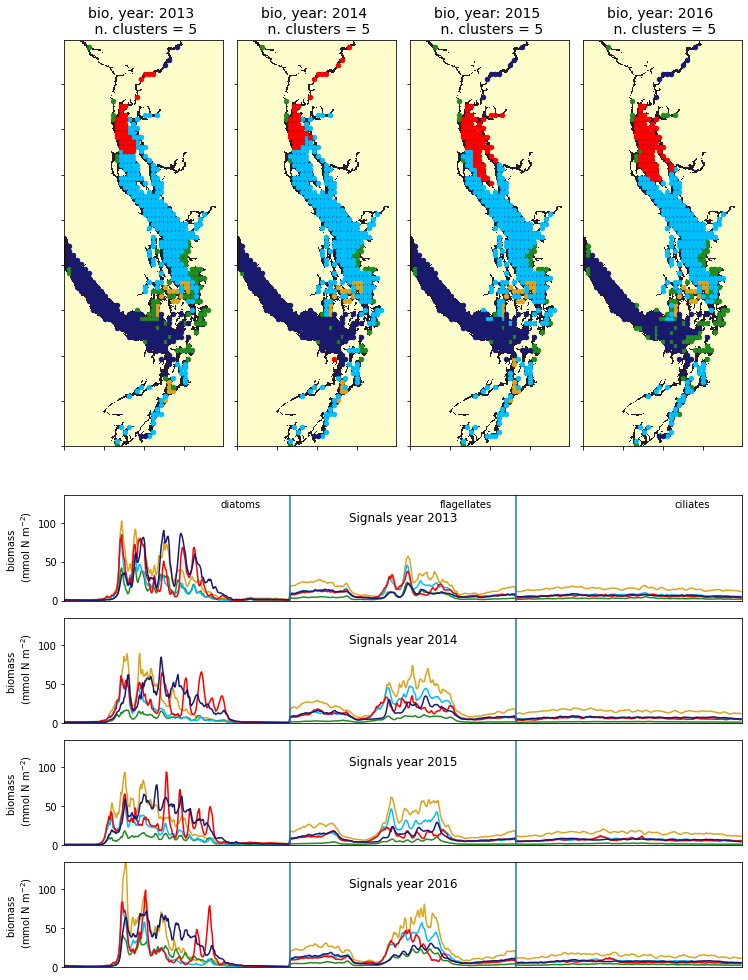

In [46]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 135
t_ylab = 'biomass \n (mmol N m$^{-2}$)'

fact = 1.5
fig = plt.figure(figsize=(7*fact, 9.25*fact))

ax1 = plt.subplot2grid((8,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','bio',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','bio',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','bio',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','bio',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((8,4), (4,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 0; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = cluster_patterns_mean_BIO(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday*3,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2013', y = 0.7)
ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])
ax1.text(285,120, "diatoms", ha='center')
ax1.text(285+365,120, "flagellates", ha='center')
ax1.text(285+365*2,120, "ciliates", ha='center')


ax1 = plt.subplot2grid((8,4), (5,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 1; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = cluster_patterns_mean_BIO(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday*3,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2014', y = 0.7)
ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])

ax1 = plt.subplot2grid((8,4), (6,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 2; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = cluster_patterns_mean_BIO(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday*3,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2015', y = 0.7)
ax1.set_xlim([0,365*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=365);ax1.axvline(x=365*2)
ax1.set_xticks([])

ax1 = plt.subplot2grid((8,4), (7,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 3; noday = 366
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = cluster_patterns_mean_BIO(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday*3,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2016', y = 0.7)
ax1.set_xlim([0,366*3]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.axvline(x=366);ax1.axvline(x=366*2)
ax1.set_xticks([])

plt.tight_layout()

var = 'bio'
fig.savefig(f'./paper_figs/{var}_4Y_YEARS_SEP.png', bbox_inches='tight')